# 欠損値のあるデータに対する処理を学ぼう

## データの情報を確認しよう

In [0]:
import pandas as pd

# データのインポート
data = pd.read_csv('missing.csv', header=0, encoding='UTF-8')
# print(data)
print(data.head())

print(data.describe())

   性別   購入数  購入カテゴリ数     購入金額  来店頻度
0  女性  10.0      6.0   1663.5   2.5
1  男性  18.0      6.0  14047.0   2.5
2  女性   NaN      2.0  12365.0   1.0
3  女性  17.0     10.0  14890.0   4.5
4  女性   5.0      5.0   8375.5   1.5
              購入数     購入カテゴリ数          購入金額        来店頻度
count  824.000000  824.000000    824.000000  825.000000
mean     8.842233    6.435680   5898.635316    2.673333
std      9.911853    6.425628   5073.690620    1.938751
min      1.000000    1.000000    132.000000    0.500000
25%      2.750000    2.000000   2228.125000    1.000000
50%      5.000000    4.000000   4671.000000    2.000000
75%     11.000000    9.000000   8077.125000    4.000000
max     66.000000   45.000000  38983.500000   10.000000


## 欠損値のある行を削除しよう

In [0]:
# 欠損値が一つ以上入っている行を削除
data_del = data.dropna(how='any', axis=0)
print(data_del.head())

   性別   購入数  購入カテゴリ数     購入金額  来店頻度
0  女性  10.0      6.0   1663.5   2.5
1  男性  18.0      6.0  14047.0   2.5
3  女性  17.0     10.0  14890.0   4.5
4  女性   5.0      5.0   8375.5   1.5
5  女性  10.0      9.0   7374.5   1.0


## 欠損値を平均値で補完しよう

In [0]:
# 欠損値を平均で置き換える
data_mean = data.fillna(data.mean())
print(data_mean.head())

   性別        購入数  購入カテゴリ数     購入金額  来店頻度
0  女性  10.000000      6.0   1663.5   2.5
1  男性  18.000000      6.0  14047.0   2.5
2  女性   8.842233      2.0  12365.0   1.0
3  女性  17.000000     10.0  14890.0   4.5
4  女性   5.000000      5.0   8375.5   1.5


# Google ColaboratoryにGoogleドライブをつなごう

## Googleドライブのマウント

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 外れ値のあるセンサーデータに対する処理を学ぼう

## ライブラリとデータのインポート

In [0]:
import numpy as np
import pandas as pd

# データのインポート
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sensor.csv', header=None, encoding='UTF-8')
print(data.head())

       0     1        2
0 -57.03 -2.75  1008.33
1 -51.12  0.06  1006.07
2 -51.97 -2.26  1007.96
3 -51.91  0.55  1009.06
4 -52.09 -0.30  1007.66


##  データを可視化しよう

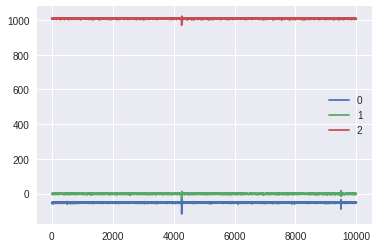

In [0]:
import matplotlib.pyplot as plt

# ビジュアライズ
data.plot()
plt.show()

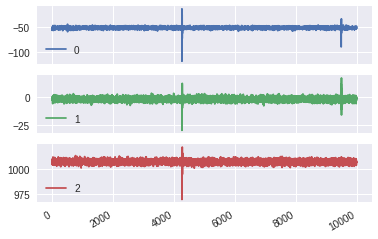

In [0]:
import matplotlib.pyplot as plt

# ビジュアライズ
data.plot(subplots=True)
plt.show()

## Hampel識別子で外れ値を除去しよう

### Hampel識別子を関数化

In [0]:
# hampelフィルター
def hampel(data):
    # 移動中央値を計算
    rolling_median=data.rolling(30).median()
    # データから移動中央値を減算し、絶対値を計算
    difference=np.abs(data -  rolling_median)
    # 中央絶対偏差を計算
    MAD = difference.rolling(30).median()
    # 閾値を計算
    threshold= 1 * 1.4826 * MAD
    # 閾値とデータを比較
    outlier_idx = difference > threshold
    # 閾値を超えるデータをnanに置き換え
    data[outlier_idx]=np.nan
    return data

### 汎用的な関数に変更

In [0]:
# hampelフィルター
def hampel(data, k=30, t0=1):
    L = 1.4826
    # 移動中央値を計算
    rolling_median=data.rolling(k).median()
    # データから移動中央値を減算し、絶対値を計算
    difference=np.abs(data -  rolling_median)
    # 中央絶対偏差を計算
    MAD = difference.rolling(k).median()
    # 閾値を計算
    threshold= t0 * L * MAD
    # 閾値とデータを比較
    outlier_idx = difference > threshold
    # 閾値を超えるデータをnanに置き換え
    data[outlier_idx]=np.nan
    return data

### データ処理

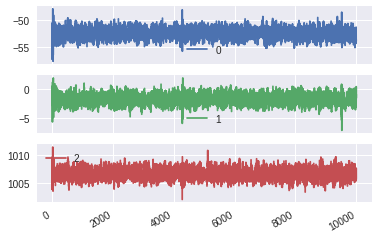

In [0]:
# データ処理
data_hm = hampel(data)

# ビジュアライズ
data_hm.plot(subplots=True)
plt.show()

# ニューラルネットワークの回帰分析をしてみよう

In [0]:
# 空のリストを準備
data_input = []
data_label = []

# 学習データを開く
data_file = open("/content/drive/My Drive/Colab Notebooks/multiple_regression.csv", "r", encoding="UTF-8")

# 入力データとラベルに分ける
for line in data_file:
    line = line.rstrip().split(",")
    if line[0] == "女性":
        data_input.append([0, 1, float(line[1]), float(line[2]), float(line[3])])
    elif line[0] == "男性":
        data_input.append([1, 0, float(line[1]), float(line[2]), float(line[3])])
    data_label.append([float(line[4])])
data_file.close()

# 標準化（平均0、分散1）
data_input = np.array(data_input) # Numpy配列に変換
print("平均：" + str(data_input.mean(axis=0))) # 平均を表示
data_input = data_input - data_input.mean(axis=0) # 平均を0にする
print("標準偏差：" + str(data_input.std(axis=0))) # 標準偏差を表示
data_input = data_input / data_input.std(axis=0) # 標準偏差を1にする

# 学習に使用するデータの数
N = 800

# 学習にデータとテストデータに分ける
x_train_data, x_test_data = np.split(data_input, [N])
t_train_data, t_test_data = np.split(data_label, [N])